<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Spark Cluster Lab

*Authors: Christoph Rahmede (LDN)*

---

Load this notebook up to the AWS cluster. The cluster is preconfigured in such a way that working with spark becomes more straight-forward. Some syntax is different from what you are used to in usual ananconda notebooks. You won't be able to run this notebook on your computer without adapting it.

In [1]:
sc.install_pypi_package("pandas")
sc.install_pypi_package("matplotlib")
sc.install_pypi_package("seaborn")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1582276490740_0001,pyspark,idle,Link,Link,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [2]:
sc.list_packages()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1  
boto                       2.49.0 
cycler                     0.10.0 
jmespath                   0.9.4  
kiwisolver                 1.1.0  
lxml                       4.4.2  
matplotlib                 3.1.3  
mysqlclient                1.4.6  
nltk                       3.4.5  
nose                       1.3.4  
numpy                      1.14.5 
pandas                     1.0.1  
pip                        20.0.2 
py-dateutil                2.2    
pyparsing                  2.4.6  
python-dateutil            2.8.1  
python36-sagemaker-pyspark 1.2.6  
pytz                       2019.3 
PyYAML                     3.11   
scipy                      1.4.1  
seaborn                    0.10.0 
setuptools                 45.2.0 
six                        1.13.0 
soupsieve                  1.9.5  
wheel                      0.34.2 
windmill                   1.6

In [3]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set(font_scale=1.5)
#%config InlineBackend.figure_format = 'retina'
#%matplotlib inline

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [4]:
%%info

ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
0,application_1582276490740_0001,pyspark,idle,Link,Link,✔


In [5]:
import pyspark as ps
from pyspark.sql import SQLContext, HiveContext

from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StandardScaler

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [6]:
sc

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

<SparkContext master=yarn appName=livy-session-0>

In [7]:
spark = ps.sql.SparkSession(sc)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [8]:
df = spark.read.csv('covtype.data', header=False, inferSchema=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [9]:
df = df.repartition(10)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [10]:
df.rdd.getNumPartitions()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

10

In [11]:
df.describe()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[summary: string, _c0: string, _c1: string, _c2: string, _c3: string, _c4: string, _c5: string, _c6: string, _c7: string, _c8: string, _c9: string, _c10: string, _c11: string, _c12: string, _c13: string, _c14: string, _c15: string, _c16: string, _c17: string, _c18: string, _c19: string, _c20: string, _c21: string, _c22: string, _c23: string, _c24: string, _c25: string, _c26: string, _c27: string, _c28: string, _c29: string, _c30: string, _c31: string, _c32: string, _c33: string, _c34: string, _c35: string, _c36: string, _c37: string, _c38: string, _c39: string, _c40: string, _c41: string, _c42: string, _c43: string, _c44: string, _c45: string, _c46: string, _c47: string, _c48: string, _c49: string, _c50: string, _c51: string, _c52: string, _c53: string, _c54: string]

In [12]:
df.first()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Row(_c0=2509, _c1=93, _c2=9, _c3=437, _c4=31, _c5=732, _c6=234, _c7=227, _c8=125, _c9=3711, _c10=1, _c11=0, _c12=0, _c13=0, _c14=0, _c15=0, _c16=0, _c17=0, _c18=0, _c19=0, _c20=0, _c21=0, _c22=0, _c23=0, _c24=0, _c25=0, _c26=0, _c27=0, _c28=0, _c29=0, _c30=0, _c31=1, _c32=0, _c33=0, _c34=0, _c35=0, _c36=0, _c37=0, _c38=0, _c39=0, _c40=0, _c41=0, _c42=0, _c43=0, _c44=0, _c45=0, _c46=0, _c47=0, _c48=0, _c49=0, _c50=0, _c51=0, _c52=0, _c53=0, _c54=2)

In [13]:
df.dtypes

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('_c0', 'int'), ('_c1', 'int'), ('_c2', 'int'), ('_c3', 'int'), ('_c4', 'int'), ('_c5', 'int'), ('_c6', 'int'), ('_c7', 'int'), ('_c8', 'int'), ('_c9', 'int'), ('_c10', 'int'), ('_c11', 'int'), ('_c12', 'int'), ('_c13', 'int'), ('_c14', 'int'), ('_c15', 'int'), ('_c16', 'int'), ('_c17', 'int'), ('_c18', 'int'), ('_c19', 'int'), ('_c20', 'int'), ('_c21', 'int'), ('_c22', 'int'), ('_c23', 'int'), ('_c24', 'int'), ('_c25', 'int'), ('_c26', 'int'), ('_c27', 'int'), ('_c28', 'int'), ('_c29', 'int'), ('_c30', 'int'), ('_c31', 'int'), ('_c32', 'int'), ('_c33', 'int'), ('_c34', 'int'), ('_c35', 'int'), ('_c36', 'int'), ('_c37', 'int'), ('_c38', 'int'), ('_c39', 'int'), ('_c40', 'int'), ('_c41', 'int'), ('_c42', 'int'), ('_c43', 'int'), ('_c44', 'int'), ('_c45', 'int'), ('_c46', 'int'), ('_c47', 'int'), ('_c48', 'int'), ('_c49', 'int'), ('_c50', 'int'), ('_c51', 'int'), ('_c52', 'int'), ('_c53', 'int'), ('_c54', 'int')]

In [14]:
feature_names = """Elevation                               quantitative    meters                       Elevation in meters
Aspect                                  quantitative    azimuth                      Aspect in degrees azimuth
Slope                                   quantitative    degrees                      Slope in degrees
Horizontal_Distance_To_Hydrology        quantitative    meters                       Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology          quantitative    meters                       Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways         quantitative    meters                       Horz Dist to nearest roadway
Hillshade_9am                           quantitative    0 to 255 index               Hillshade index at 9am, summer solstice
Hillshade_Noon                          quantitative    0 to 255 index               Hillshade index at noon, summer soltice
Hillshade_3pm                           quantitative    0 to 255 index               Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points      quantitative    meters                       Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns)      qualitative     0 (absence) or 1 (presence)  Wilderness area designation
Soil_Type (40 binary columns)           qualitative     0 (absence) or 1 (presence)  Soil Type designation
Cover_Type (7 types)                    integer         1 to 7                       Forest Cover Type designation
"""

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [15]:
column_names = [
        "Elevation", "Aspect", "Slope",
        "Horizontal_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology",
        "Horizontal_Distance_To_Roadways",
        "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
        "Horizontal_Distance_To_Fire_Points"] + [
        f"Wilderness_Area_{i}" for i in range(4)]+ [
    f"Soil_Type_{i}" for i in range(40)]+ ["Cover_Type"]


VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [16]:
column_names

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1', 'Wilderness_Area_2', 'Wilderness_Area_3', 'Soil_Type_0', 'Soil_Type_1', 'Soil_Type_2', 'Soil_Type_3', 'Soil_Type_4', 'Soil_Type_5', 'Soil_Type_6', 'Soil_Type_7', 'Soil_Type_8', 'Soil_Type_9', 'Soil_Type_10', 'Soil_Type_11', 'Soil_Type_12', 'Soil_Type_13', 'Soil_Type_14', 'Soil_Type_15', 'Soil_Type_16', 'Soil_Type_17', 'Soil_Type_18', 'Soil_Type_19', 'Soil_Type_20', 'Soil_Type_21', 'Soil_Type_22', 'Soil_Type_23', 'Soil_Type_24', 'Soil_Type_25', 'Soil_Type_26', 'Soil_Type_27', 'Soil_Type_28', 'Soil_Type_29', 'Soil_Type_30', 'Soil_Type_31', 'Soil_Type_32', 'Soil_Type_33', 'Soil_Type_34', 'Soil_Type_35', 'Soil_Type_36', 'Soil_Type_37', 'Soil_Type_38', 'Soil_Type_39', 'Cover_Type']

In [17]:
len(column_names)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

55

In [18]:
len(df.columns)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

55

In [19]:
df = df.toDF(*column_names)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [20]:
df.show(2)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------+------+-----+--------------------------------+------------------------------+-------------------------------+-------------+--------------+-------------+----------------------------------+-----------------+-----------------+-----------------+-----------------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+-----------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+----------+
|Elevation|Aspect|Slope|Horizontal_Distance_To_Hydrology|Vertical_Distance_To_Hydrology|Horizontal_Distance_To_Roadways|Hillshade_9am|Hillshade_Noon|Hillshade_3pm|Horizontal_Distance_To_Fire_Points|Wilderness

In [21]:
df.select('Cover_Type').distinct().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+
|Cover_Type|
+----------+
|         1|
|         6|
|         3|
|         5|
|         4|
|         7|
|         2|
+----------+

In [22]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- Elevation: integer (nullable = true)
 |-- Aspect: integer (nullable = true)
 |-- Slope: integer (nullable = true)
 |-- Horizontal_Distance_To_Hydrology: integer (nullable = true)
 |-- Vertical_Distance_To_Hydrology: integer (nullable = true)
 |-- Horizontal_Distance_To_Roadways: integer (nullable = true)
 |-- Hillshade_9am: integer (nullable = true)
 |-- Hillshade_Noon: integer (nullable = true)
 |-- Hillshade_3pm: integer (nullable = true)
 |-- Horizontal_Distance_To_Fire_Points: integer (nullable = true)
 |-- Wilderness_Area_0: integer (nullable = true)
 |-- Wilderness_Area_1: integer (nullable = true)
 |-- Wilderness_Area_2: integer (nullable = true)
 |-- Wilderness_Area_3: integer (nullable = true)
 |-- Soil_Type_0: integer (nullable = true)
 |-- Soil_Type_1: integer (nullable = true)
 |-- Soil_Type_2: integer (nullable = true)
 |-- Soil_Type_3: integer (nullable = true)
 |-- Soil_Type_4: integer (nullable = true)
 |-- Soil_Type_5: integer (nullable = true)
 |-- Soil_Type

In [23]:
cover_type = df.select('Cover_Type')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [24]:
cover_type_count = cover_type.groupBy('Cover_Type').count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
cover_type_count.toPandas().sort_values(by='Cover_Type').plot(kind='bar', x='Cover_Type', y='count')
plt.xticks(rotation=0)
plt.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

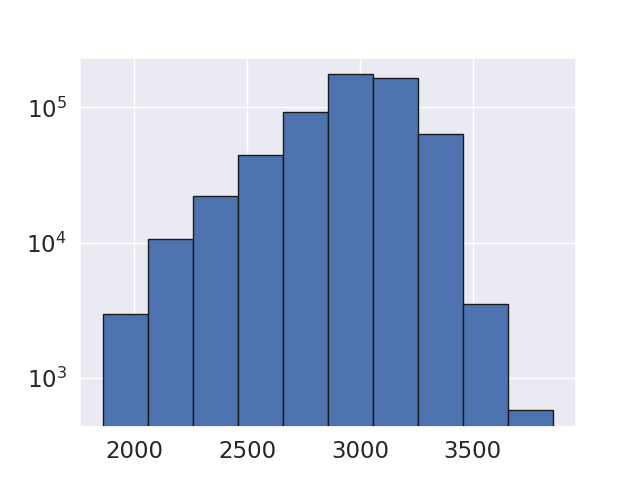

In [26]:
bins, counts = df.select('Elevation').rdd.flatMap(lambda x: x).histogram(buckets=10)

fig, ax = plt.subplots()
ax.bar(bins[:-1], counts, width=np.diff(bins), ec="k", align="edge")
ax.set_yscale('log')

plt.show()
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

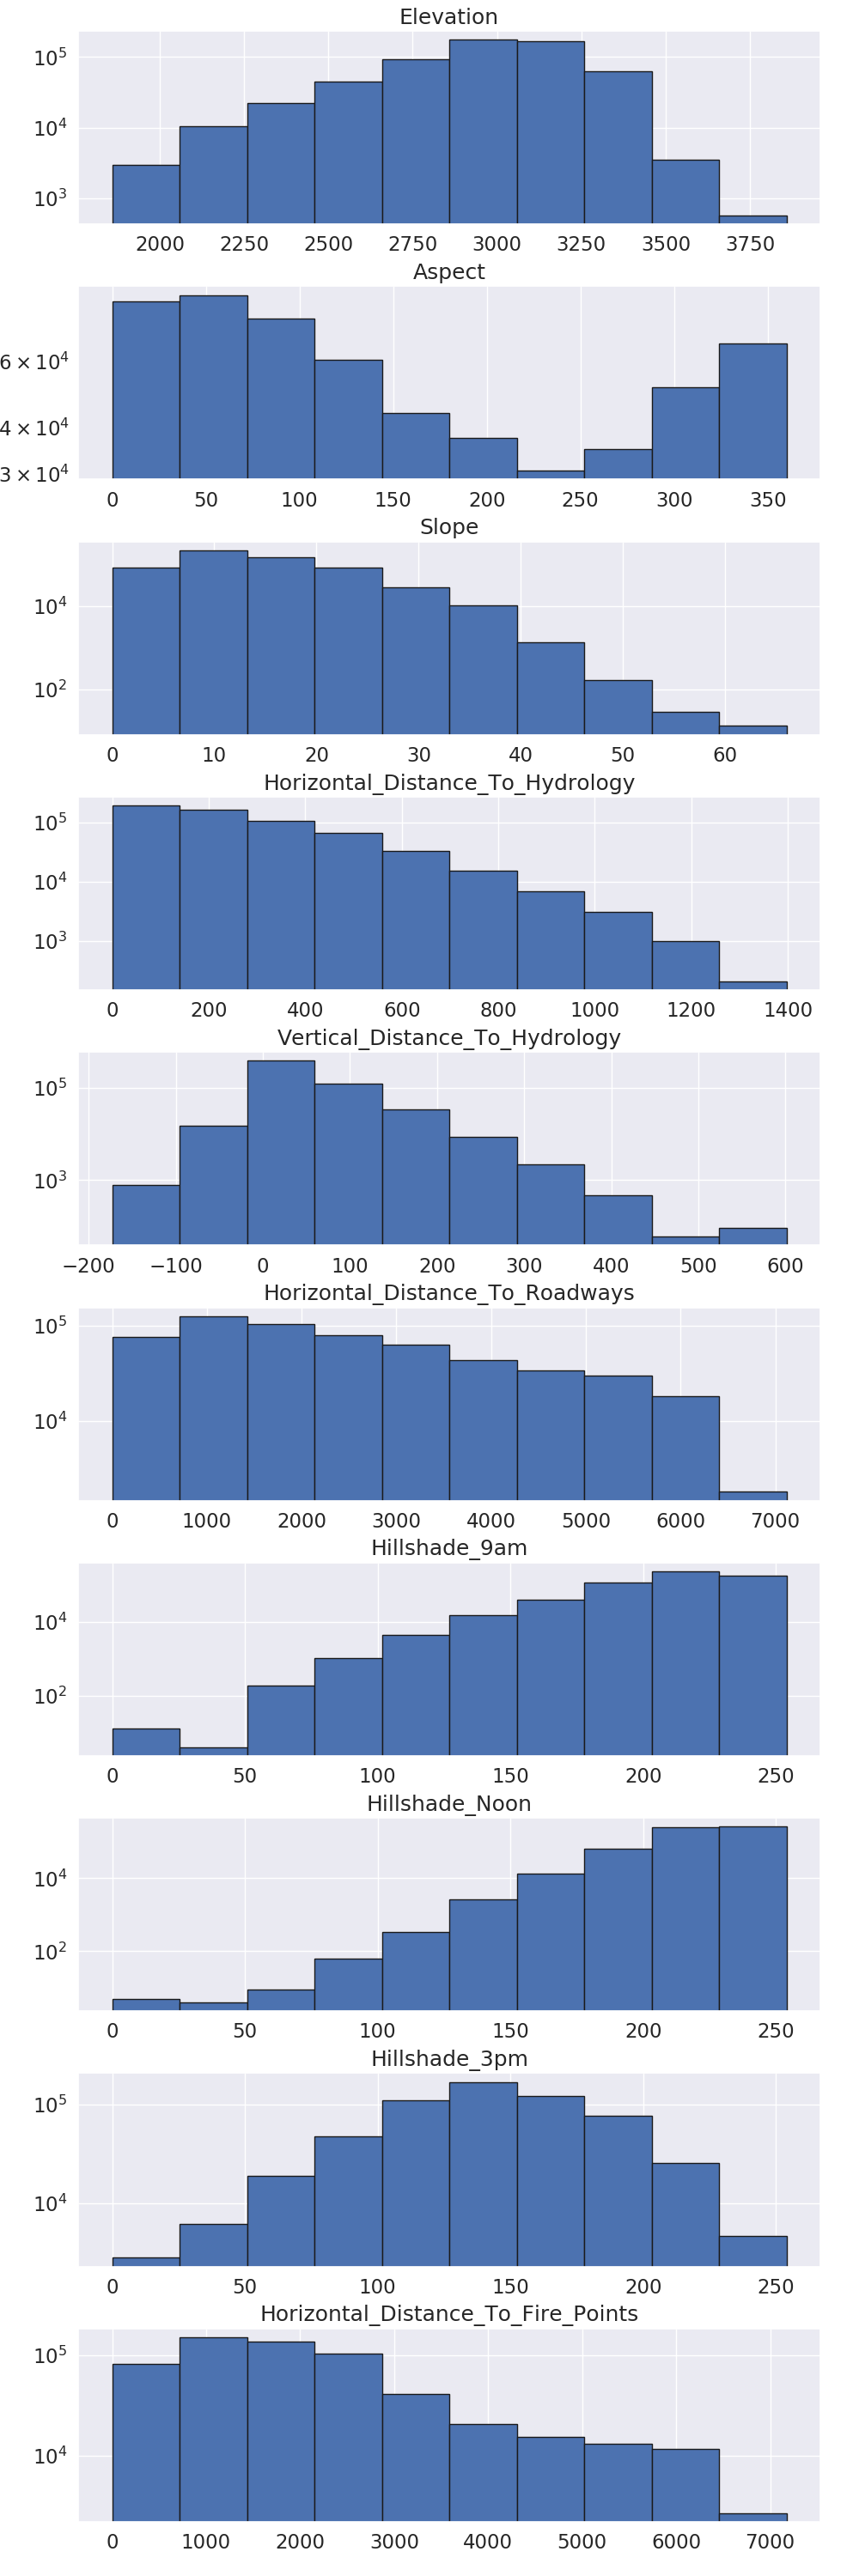

In [27]:
fig, ax = plt.subplots(nrows=10, figsize=(10, 30))
fig.tight_layout()
for i, col in enumerate(df.columns[:10]):
    bins, counts = df.select(df.columns[i]).rdd.flatMap(lambda x: x).histogram(buckets=10)
    ax[i].bar(bins[:-1], counts, width=np.diff(bins), ec="k", align="edge")
    ax[i].set_yscale('log')
    ax[i].set_title(col)
    
%matplot plt

In [28]:
df.select('Wilderness_Area_0').describe().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary| Wilderness_Area_0|
+-------+------------------+
|  count|            581012|
|   mean|0.4488650836815763|
| stddev|0.4973787752982265|
|    min|                 0|
|    max|                 1|
+-------+------------------+

In [29]:
wilderness_areas = {}
for i in range(4):
    wilderness_areas[i] = df.filter(df[f'Wilderness_Area_{i}']==1).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

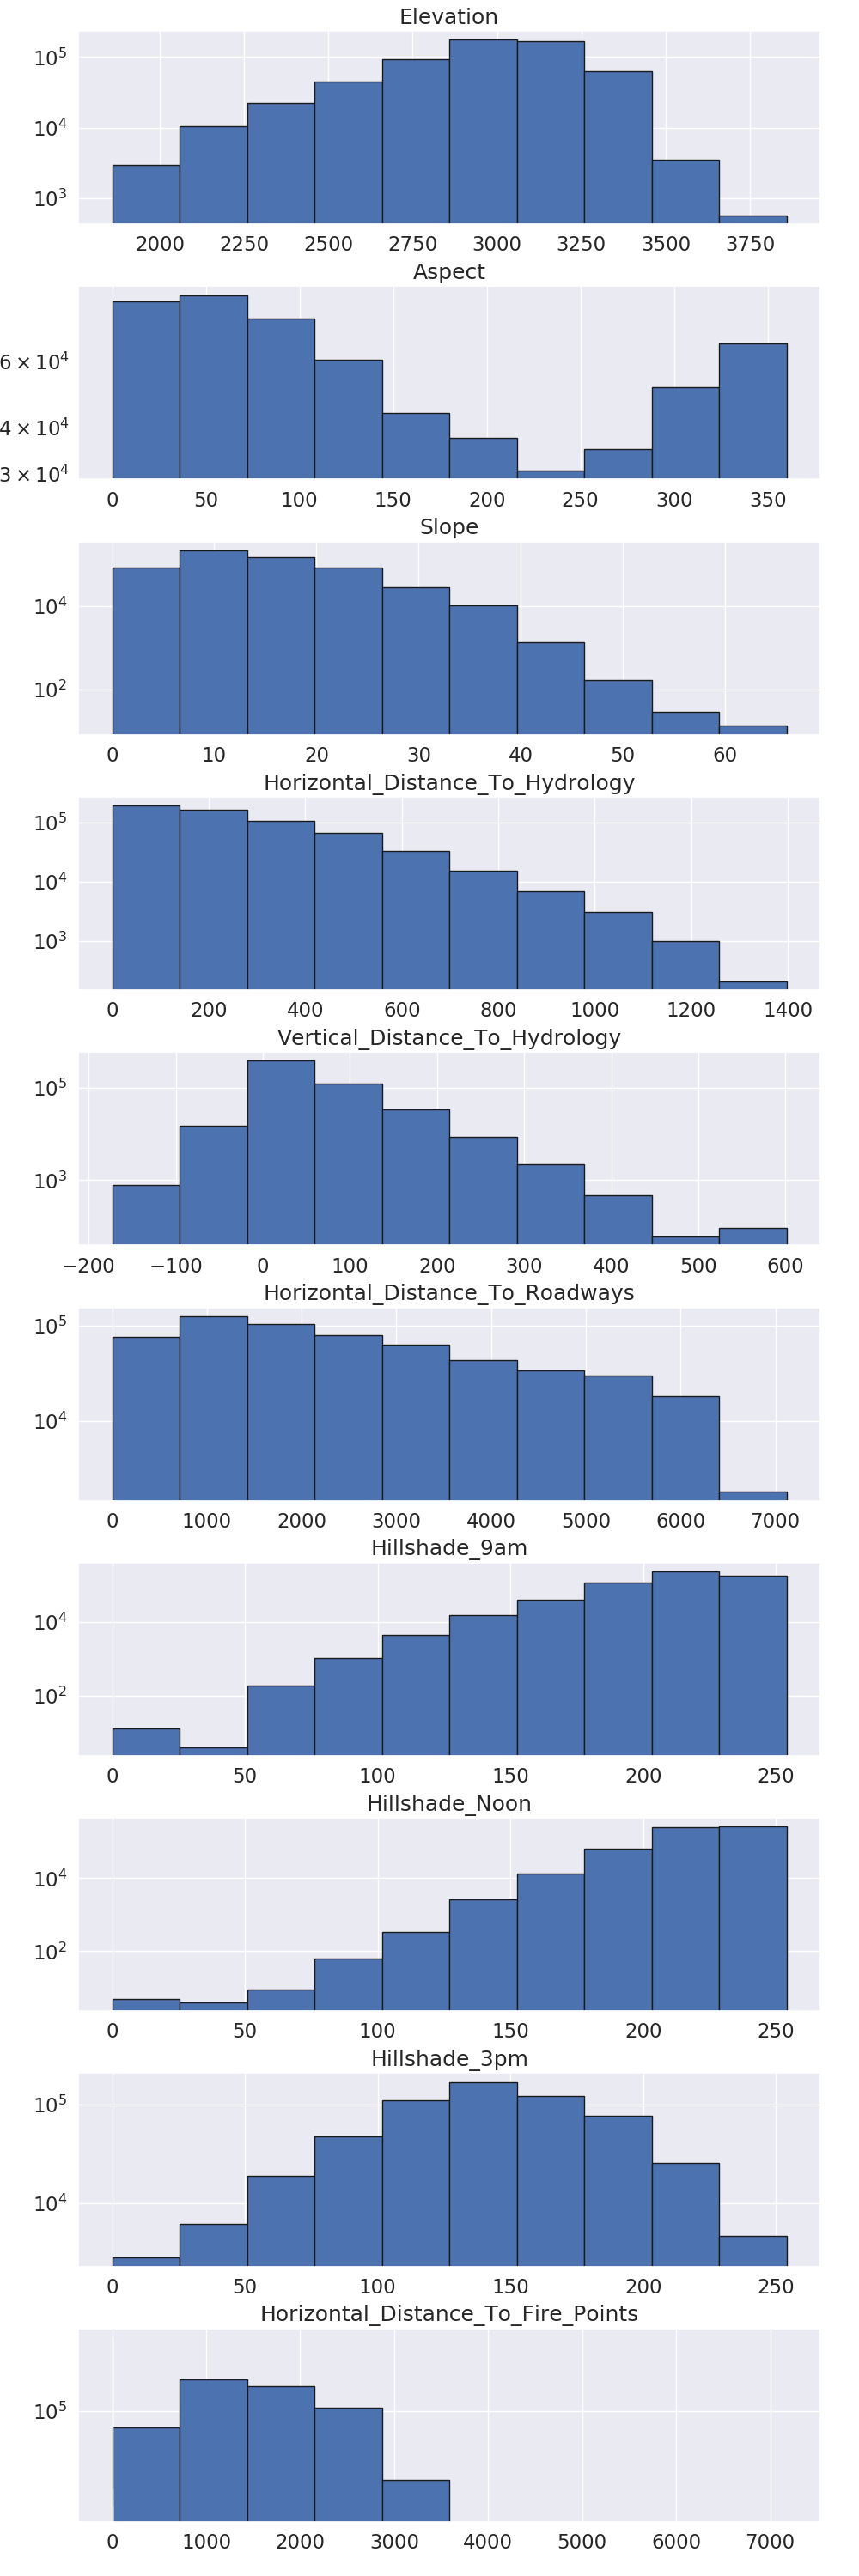

In [30]:
plt.bar(wilderness_areas.keys(), wilderness_areas.values())
plt.yscale('log')
%matplot plt

In [31]:
df.select(f'Soil_Type_38').summary().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-------------------+
|summary|       Soil_Type_38|
+-------+-------------------+
|  count|             581012|
|   mean|0.02376198770421265|
| stddev| 0.1523069124183251|
|    min|                  0|
|    25%|                  0|
|    50%|                  0|
|    75%|                  0|
|    max|                  1|
+-------+-------------------+

In [32]:
soiltypes = {}
for i in range(40):
    soiltypes[i] = df.filter(df[f'Soil_Type_{i}']==1).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

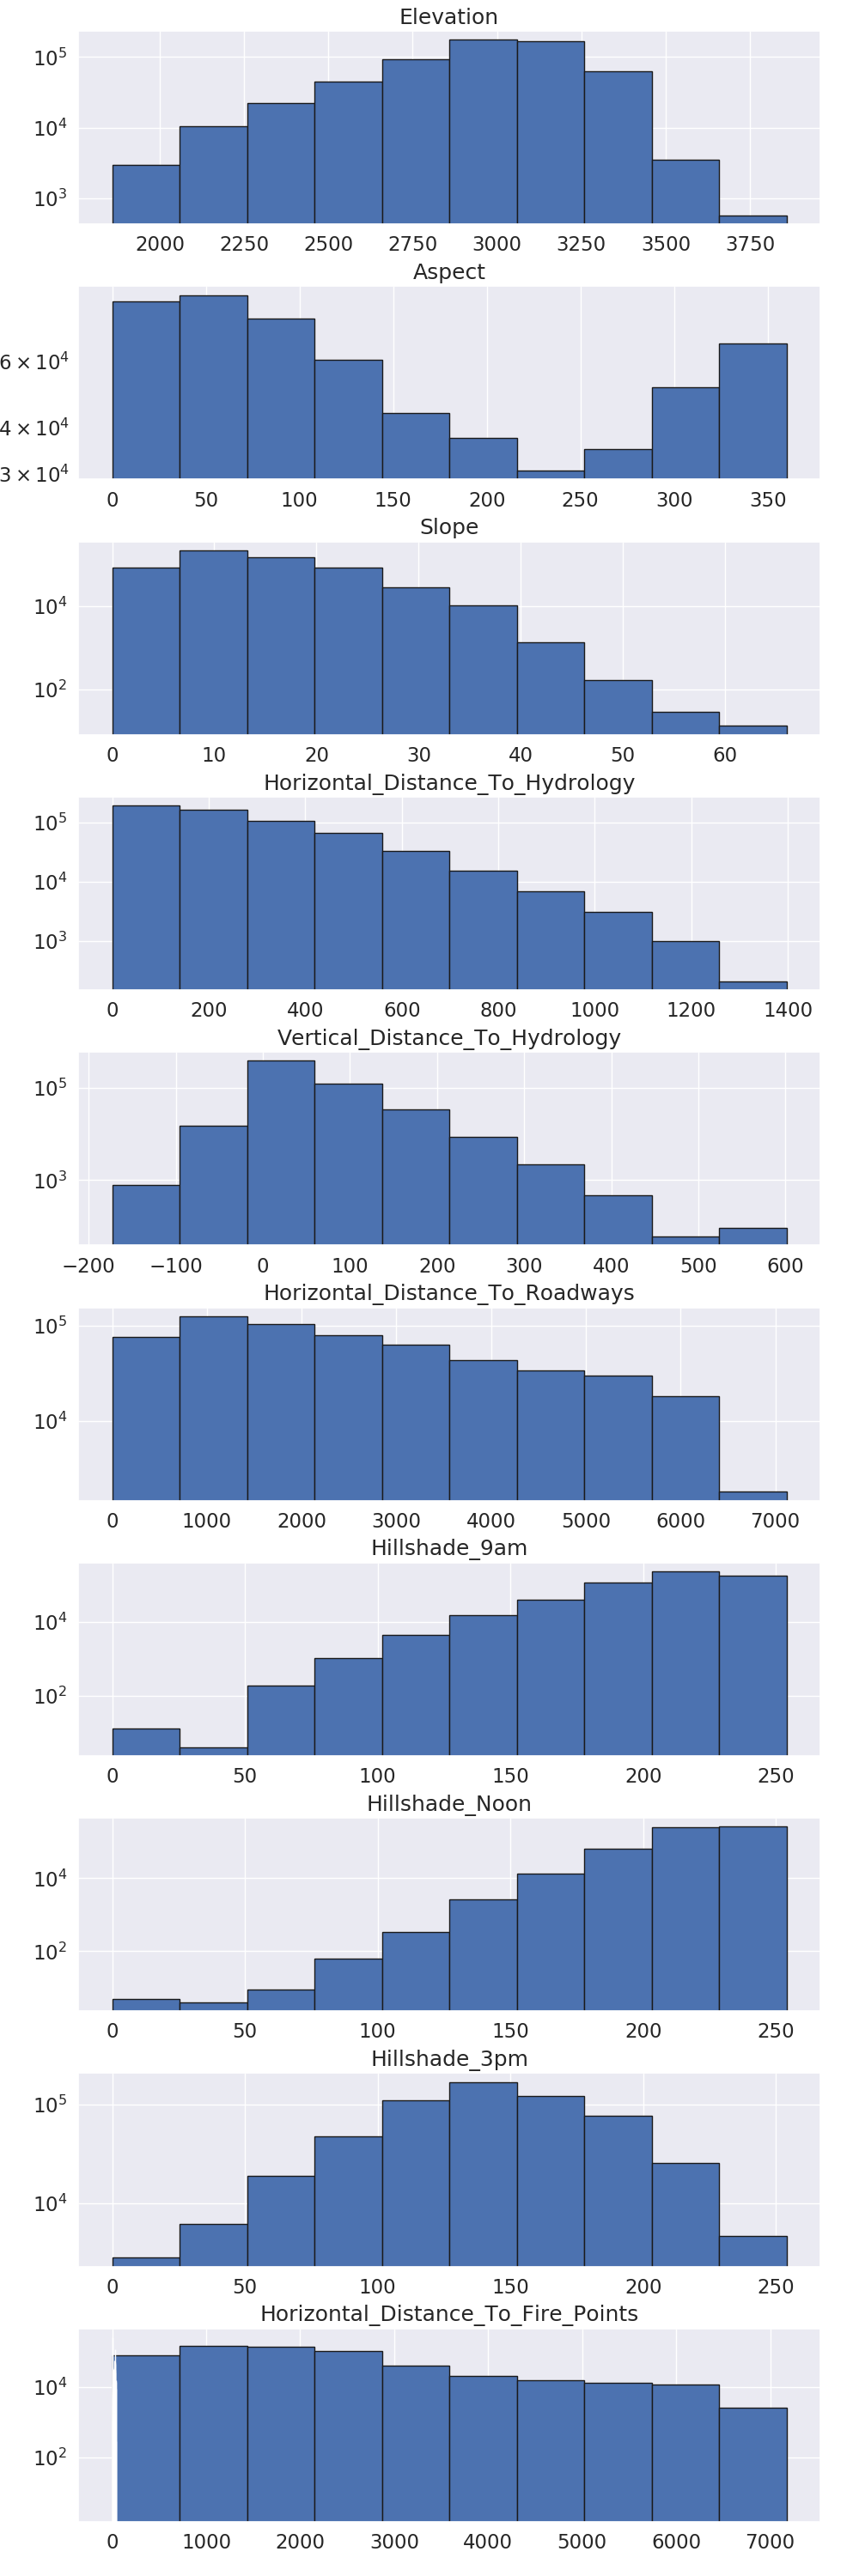

In [33]:
plt.bar(soiltypes.keys(), soiltypes.values())
plt.yscale('log')
%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

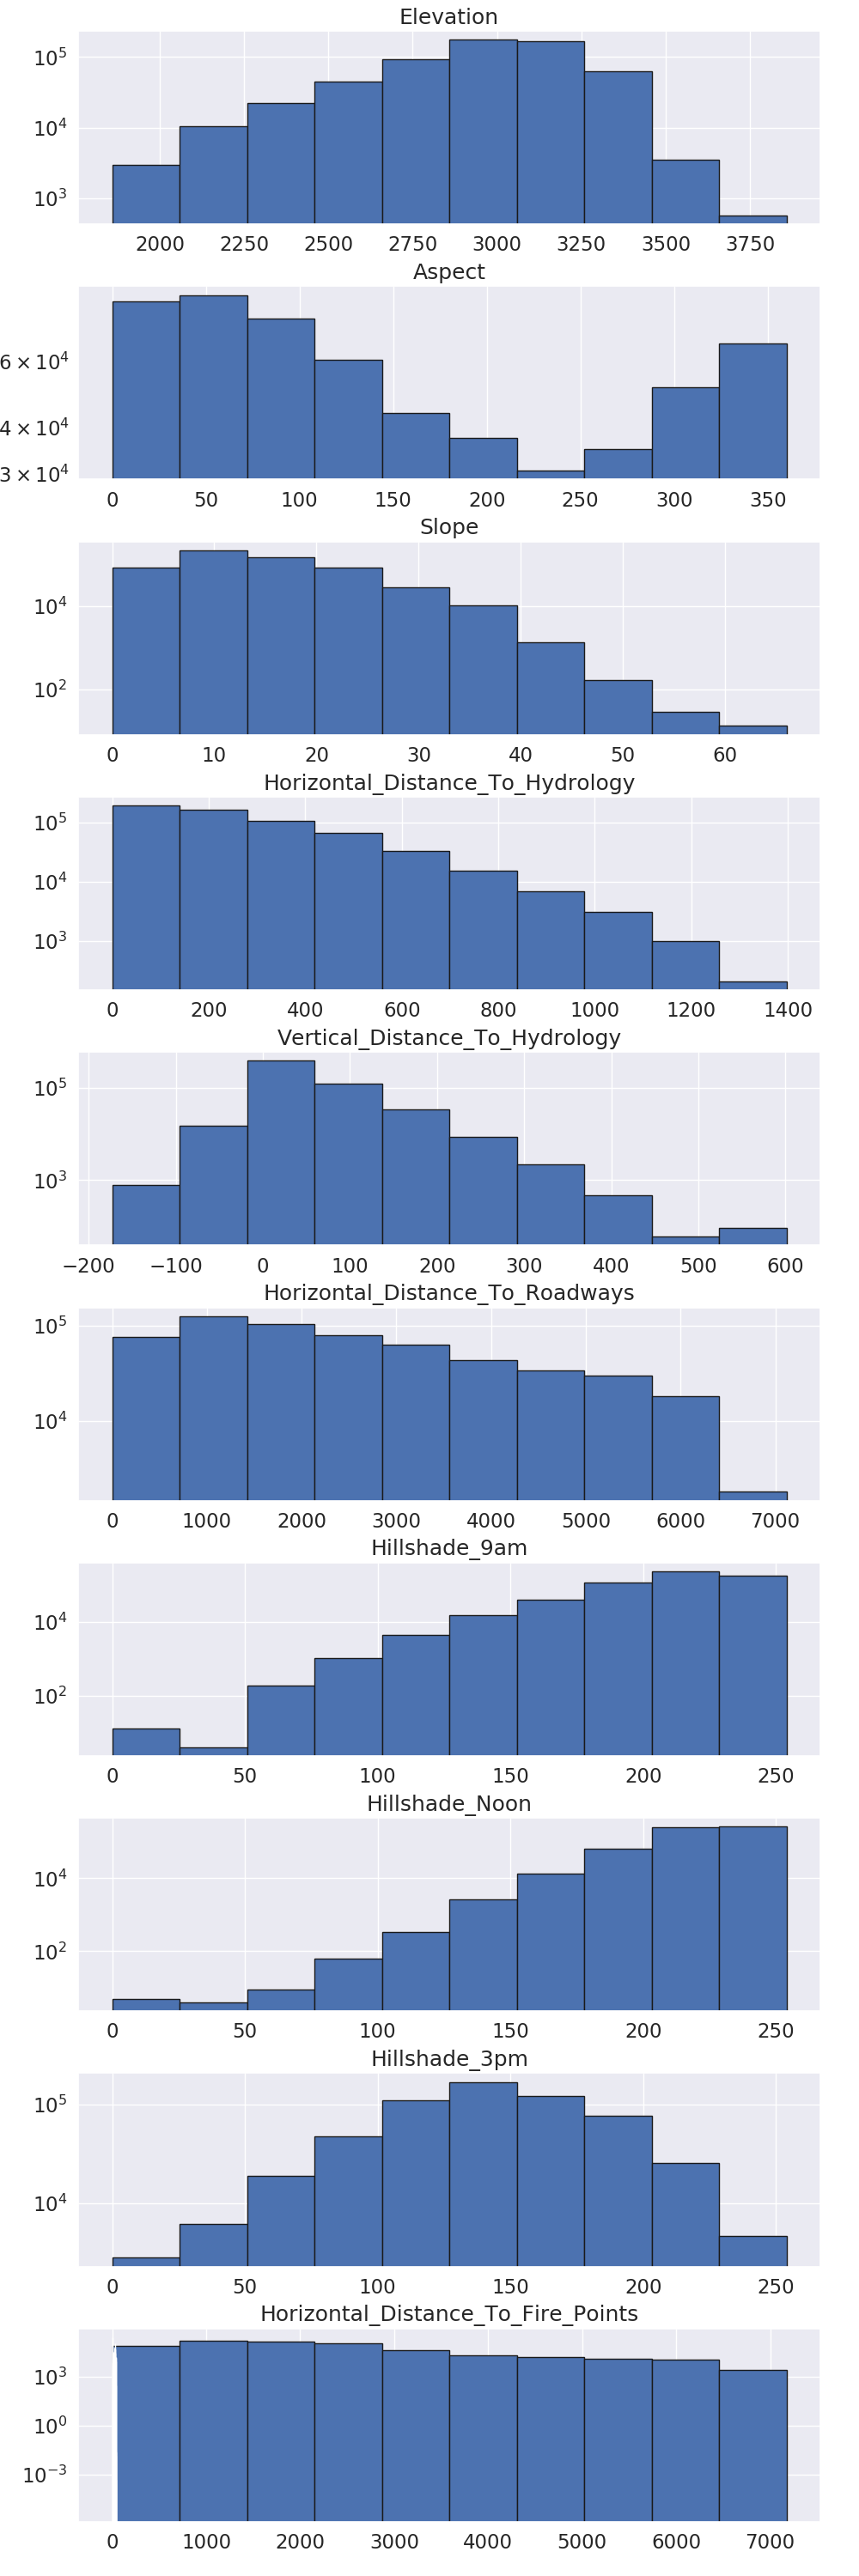

In [34]:
plt.bar(soiltypes.keys(), np.array(list(soiltypes.values()))/df.count())
plt.yscale('log')
%matplot plt

In [35]:
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.feature import StandardScaler, VectorAssembler
from pyspark.ml.classification import DecisionTreeClassifier, DecisionTreeClassificationModel
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [36]:
features = df.columns[:-1]
label_column = df.columns[-1]

vector_assembler = VectorAssembler(inputCols=df.columns[:-1],
                                  outputCol="features")
df_vec = vector_assembler.transform(df)

(data_train, data_test) = df_vec.randomSplit([0.9, 0.1], seed=1)

data_train.cache()
data_test.cache()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

DataFrame[Elevation: int, Aspect: int, Slope: int, Horizontal_Distance_To_Hydrology: int, Vertical_Distance_To_Hydrology: int, Horizontal_Distance_To_Roadways: int, Hillshade_9am: int, Hillshade_Noon: int, Hillshade_3pm: int, Horizontal_Distance_To_Fire_Points: int, Wilderness_Area_0: int, Wilderness_Area_1: int, Wilderness_Area_2: int, Wilderness_Area_3: int, Soil_Type_0: int, Soil_Type_1: int, Soil_Type_2: int, Soil_Type_3: int, Soil_Type_4: int, Soil_Type_5: int, Soil_Type_6: int, Soil_Type_7: int, Soil_Type_8: int, Soil_Type_9: int, Soil_Type_10: int, Soil_Type_11: int, Soil_Type_12: int, Soil_Type_13: int, Soil_Type_14: int, Soil_Type_15: int, Soil_Type_16: int, Soil_Type_17: int, Soil_Type_18: int, Soil_Type_19: int, Soil_Type_20: int, Soil_Type_21: int, Soil_Type_22: int, Soil_Type_23: int, Soil_Type_24: int, Soil_Type_25: int, Soil_Type_26: int, Soil_Type_27: int, Soil_Type_28: int, Soil_Type_29: int, Soil_Type_30: int, Soil_Type_31: int, Soil_Type_32: int, Soil_Type_33: int, S

In [37]:
data_train.rdd.getNumPartitions()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

10

In [38]:
data_test.rdd.getNumPartitions()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

10

In [39]:
model = DecisionTreeClassifier(featuresCol=vector_assembler.getOutputCol(),
                               labelCol=label_column)

evaluator = MulticlassClassificationEvaluator(
    predictionCol='prediction',
    labelCol=label_column,
    metricName='accuracy'
)

paramGrid = ParamGridBuilder() \
    .addGrid(model.maxDepth, [3, 20]) \
    .build()

# the actual gridsearch
crossval = CrossValidator(estimator=model,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5
                         )

# Run cross-validation, and choose the best set of parameters.
model_fit = crossval.fit(data_train)

print('Average cv scores:')
print(np.around(np.array(model_fit.avgMetrics), 4))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Average cv scores:
[0.6737 0.9037]

In [40]:
java_model = model_fit.bestModel._java_obj

print('Best model parameters:')
print({param.name: java_model.getOrDefault(java_model.getParam(param.name))
       for param in paramGrid[0]})
print()
# print(java_model.explainParams())

predictions = model_fit.transform(data_test)

print('Best model test accuracy:')
print(evaluator.evaluate(predictions))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Best model parameters:
{'maxDepth': 20}

Best model test accuracy:
0.9096025749152309

In [45]:
conf_mat = predictions.crosstab(label_column, 'prediction').sort('Cover_Type_prediction').toPandas()
conf_mat

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Cover_Type_prediction    1.0    2.0   3.0  4.0  5.0   6.0   7.0
0                     1  19033   2016     1    0   12     9   117
1                     2   1398  26548    92    0   84    92    15
2                     3      5    153  3228   31    8   250     0
3                     4      0      0    32  225    0    22     0
4                     5     31    391    10    0  541     2     0
5                     6      5    133   181    8    5  1427     0
6                     7    136     13     0    0    0     0  1845

In [46]:
conf_mat.set_index('Cover_Type_prediction', inplace=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [47]:
conf_mat = conf_mat.T.sort_index().T
conf_mat.columns = list(range(1, 8))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

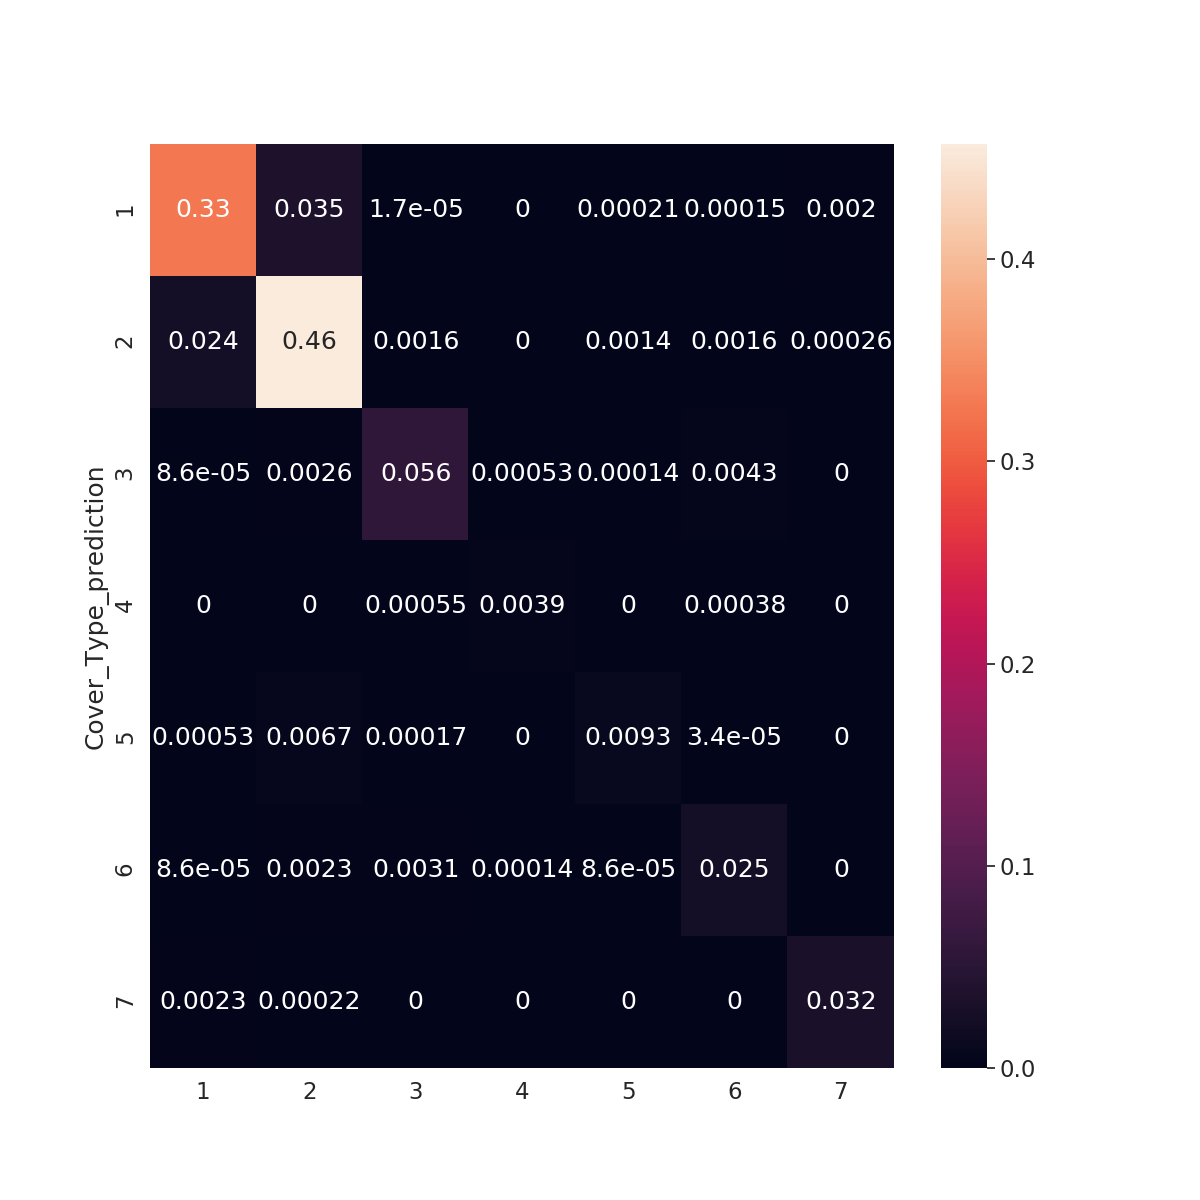

In [48]:
plt.figure(figsize=(12, 12))
sns.heatmap(conf_mat.iloc[:, :]/conf_mat.iloc[:, :].sum().sum(), annot=True)
%matplot plt

In [49]:
from pyspark.ml.classification import RandomForestClassifier, RandomForestClassificationModel

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [ ]:
model = RandomForestClassifier(featuresCol=vector_assembler.getOutputCol(),
                               labelCol=label_column, numTrees=40)


evaluator = MulticlassClassificationEvaluator(
    predictionCol='prediction',
    labelCol=label_column,
    metricName='accuracy'
)

paramGrid = ParamGridBuilder() \
    .addGrid(model.maxDepth, [3, 20]) \
    .build()

# the actual gridsearch
crossval = CrossValidator(estimator=model,
                          estimatorParamMaps=paramGrid,
                          evaluator=evaluator,
                          numFolds=5)

# Run cross-validation, and choose the best set of parameters.
model_fit = crossval.fit(data_train)

In [60]:
print('Average cv scores:')
print(np.around(np.array(model_fit.avgMetrics), 4))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Average cv scores:
[0.6564 0.841 ]

In [61]:
java_model = model_fit.bestModel._java_obj

print('Best model parameters:')
print({param.name: java_model.getOrDefault(java_model.getParam(param.name))
       for param in paramGrid[0]})
print()

predictions = model_fit.transform(data_test)

print('Best model test accuracy:')
print(evaluator.evaluate(predictions))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Best model parameters:
{'maxDepth': 20}

Best model test accuracy:
0.8352123100225477

In [62]:
conf_mat = predictions.crosstab(label_column, 'prediction').sort('Cover_Type_prediction').toPandas()
conf_mat.iloc[:, :-1]

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Cover_Type_prediction    1.0    2.0   3.0  4.0  5.0  6.0
0                     1  17033   4031     9    0    0    5
1                     2   2621  25398   158    1   12   26
2                     3      0    271  3307   10    0   87
3                     4      0      0    89  185    0    5
4                     5     28    755    22    0  168    2
5                     6      2    358   493    5    0  901
6                     7    448     13     0    0    0    0

In [63]:
sns.heatmap(conf_mat.iloc[:, 1:]);

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [64]:
sns.heatmap(conf_mat.iloc[:, 1:]/conf_mat.iloc[:, 1:].sum().sum(), annot=True);

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [65]:
m_1 = RandomForestClassificationModel(java_model=java_model)
m_1.featureImportances

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparseVector(54, {0: 0.3341, 1: 0.0222, 2: 0.0174, 3: 0.0361, 4: 0.028, 5: 0.075, 6: 0.0193, 7: 0.0269, 8: 0.0177, 9: 0.0654, 10: 0.0202, 11: 0.0069, 12: 0.0247, 13: 0.0657, 14: 0.0022, 15: 0.0179, 16: 0.0039, 17: 0.0244, 18: 0.0007, 19: 0.0057, 20: 0.0, 21: 0.0, 22: 0.0001, 23: 0.0267, 24: 0.004, 25: 0.0164, 26: 0.0046, 27: 0.0005, 29: 0.0009, 30: 0.0025, 31: 0.0005, 32: 0.0009, 33: 0.0021, 34: 0.0009, 35: 0.0252, 36: 0.017, 37: 0.0049, 38: 0.0003, 39: 0.0003, 40: 0.0008, 41: 0.0001, 42: 0.0067, 43: 0.0034, 44: 0.0046, 45: 0.0073, 46: 0.0043, 47: 0.0005, 48: 0.0021, 49: 0.0001, 50: 0.001, 51: 0.0189, 52: 0.0176, 53: 0.0103})

In [66]:
sorted(list(zip(features, m_1.featureImportances.toArray())), 
       key=lambda x: x[1], reverse=True)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

[('Elevation', 0.33411839560893314), ('Horizontal_Distance_To_Roadways', 0.07499935088212231), ('Wilderness_Area_3', 0.06571367442687107), ('Horizontal_Distance_To_Fire_Points', 0.0653569669738038), ('Horizontal_Distance_To_Hydrology', 0.03608118248405933), ('Vertical_Distance_To_Hydrology', 0.028018601295581546), ('Hillshade_Noon', 0.0269320390388879), ('Soil_Type_9', 0.026700739021157657), ('Soil_Type_21', 0.025156520853279015), ('Wilderness_Area_2', 0.024707108113772726), ('Soil_Type_3', 0.024442702043540696), ('Aspect', 0.02221288510253977), ('Wilderness_Area_0', 0.020162367599620177), ('Hillshade_9am', 0.01930697353933401), ('Soil_Type_37', 0.018913221881660405), ('Soil_Type_1', 0.01794964062149428), ('Hillshade_3pm', 0.017651501391796328), ('Soil_Type_38', 0.017638340042250376), ('Slope', 0.017362772630210906), ('Soil_Type_22', 0.017023584622495376), ('Soil_Type_11', 0.01638108859185962), ('Soil_Type_39', 0.010297650409939237), ('Soil_Type_31', 0.007331645202577679), ('Wilderness

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

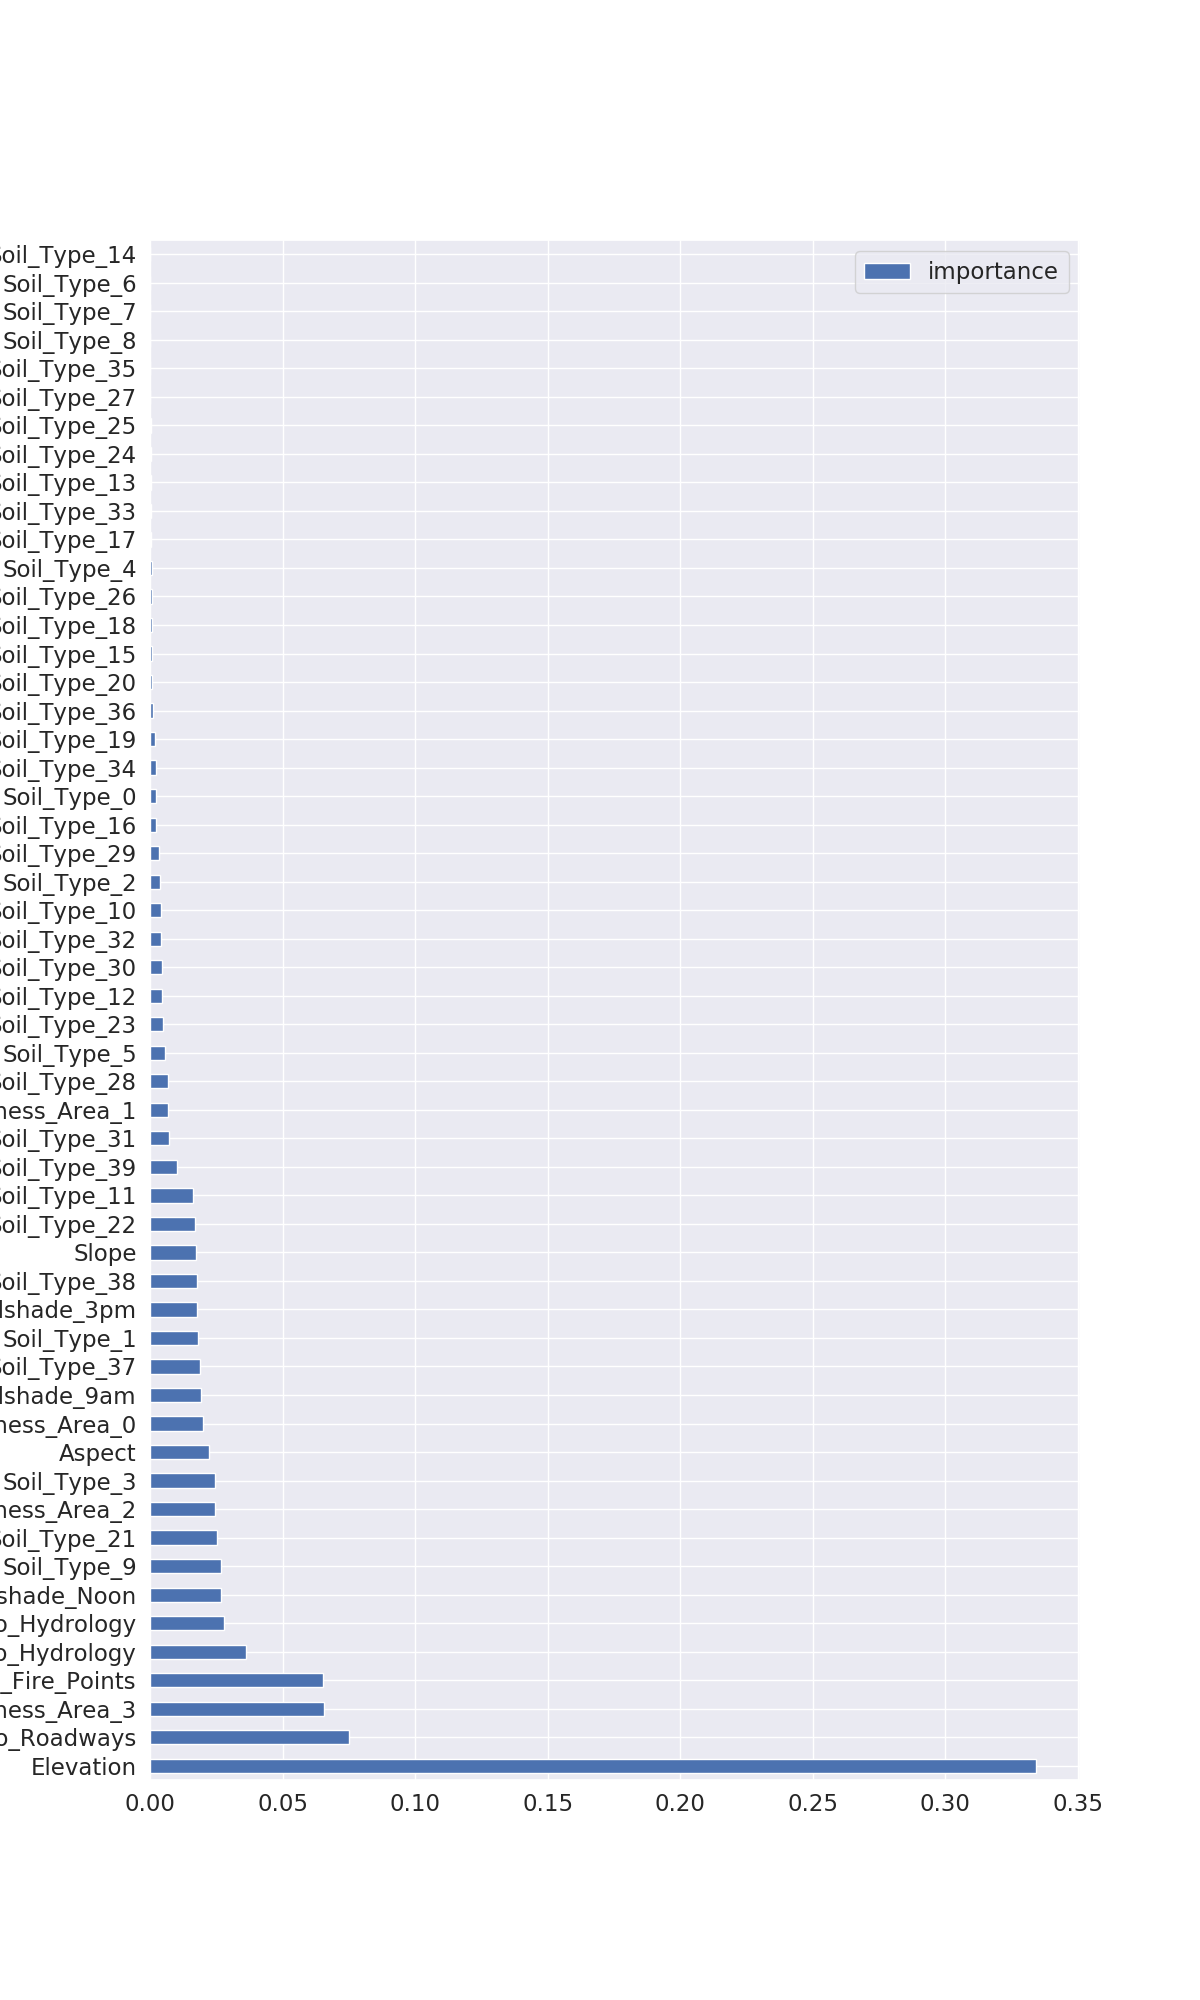

In [67]:
pd.DataFrame(sorted(list(zip(features, m_1.featureImportances.toArray())), 
       key=lambda x: x[1], reverse=True), columns=['feature', 'importance']).plot(
    kind='barh', x='feature', y='importance', figsize=(12, 20))
%matplot plt

In [68]:
# baseline
counts = df.groupby(label_column).count().select('count')
counts.sort('count', ascending=False).first()['count']/df.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

0.48759922342395684